In [2]:
import extract_mfcc_htk_way as essMFCC_
import HTKPython as HTK
import numpy as np
import matplotlib.pyplot as plt

In [6]:
########### extract filterbank with htk
URImfcFile_no_preemp = 'HTK/vignesh.config_wav_to_mfcc_0' # with cpestral  mean norm
HTKFeat_reader_no_preemp =  HTK.htk_open(URImfcFile_no_preemp, 'rb')
htkMFCC_CMN = HTKFeat_reader_no_preemp.getall()
htkMFCC_CMN = htkMFCC_CMN.T
htkMFCC_CMN = htkMFCC_CMN[[-1,0,1,2,3,4,5,6,7,8,9,10,11],:]

URImfcFile_no_preemp = 'HTK/vignesh.mfc_no_preemph' # without cpestral  mean norm
HTKFeat_reader_no_preemp =  HTK.htk_open(URImfcFile_no_preemp, 'rb')
htkMFCC = HTKFeat_reader_no_preemp.getall()
htkMFCC = htkMFCC.T
htkMFCC = htkMFCC[[-1,0,1,2,3,4,5,6,7,8,9,10,11],:]

essMFCC_1 = essMFCC_.extractor('audio/vignesh.wav', 0) # putting zero is same as PREEMCOEF =  0 in htk

# cepstral zero-mean
essMFCC_1  = np.matrix(essMFCC_1)
essMFCC_1 = essMFCC_1 - essMFCC_1.mean(axis=1) # htk does maybe a bit different normalization of 0-th coefficient

htkMFCC = np.matrix(htkMFCC)
htkMFCC = htkMFCC - htkMFCC.mean(axis=1)

The HTK configuration file config_wav_to_mfcc_0 has TARGETKIND = MFCC_Z. Without the flag _0 it doesn't include the 0 coefficient [http://www.ee.columbia.edu/ln/LabROSA/doc/HTKBook21/node58.html]. As it can be seen below the first and the last rows have the same values.

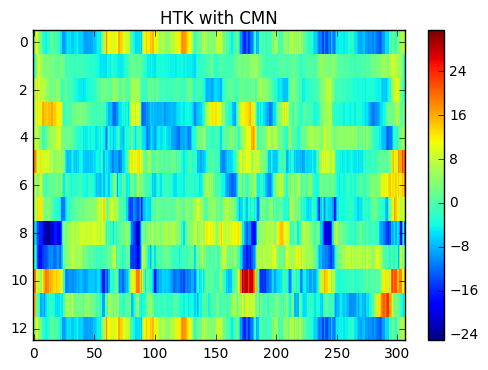

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [4]:
# Ploting HTK
plt.imshow(htkMFCC_CMN, aspect = 'auto', interpolation='none')
plt.title('HTK with CMN')
plt.colorbar()
plt.show()

#note that the first and last rows are the same:
print htkMFCC_CMN[0] - htkMFCC_CMN[-1]

According to [http://www.dsic.upv.es/docs/posgrado/20/RES/materialesDocentes/alejandroViewgraphs/htkbook.pdf#section.5.6] CMN is applied to the cepstral parameters, hence after the DCT is computed. I don't know if it is done after or before liftering, but with L = 0 it should be the last step as in the matlab inplementation. 
Comparing MFCCS on Essentia and HTK and computing CMN manually lead to very close results: 

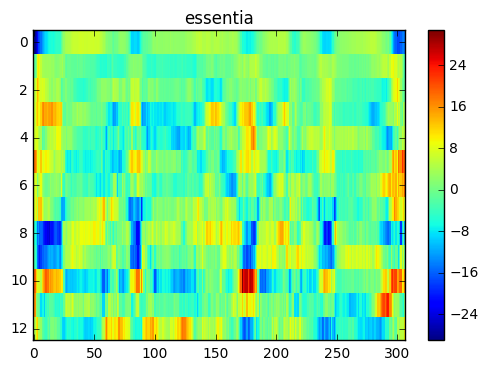

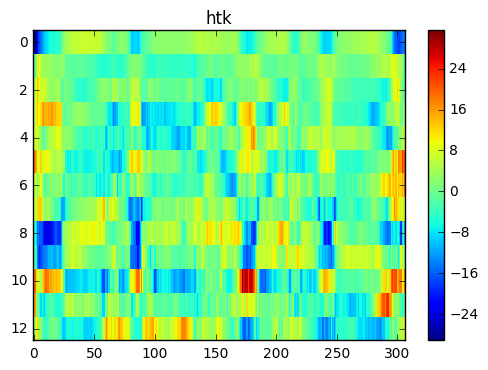

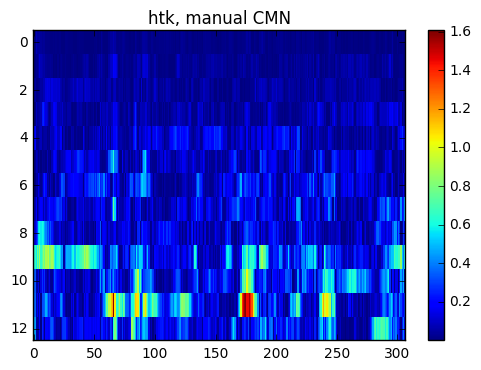

In [7]:
# Ploting Essentia
plt.imshow(essMFCC_1, aspect = 'auto', interpolation='none')
plt.title('essentia')
plt.colorbar()
plt.show()

# Ploting HTK
plt.imshow(htkMFCC, aspect = 'auto', interpolation='none') # ignore enery
plt.title('htk')
plt.colorbar()
plt.show()

# Ploting Difference 
plt.imshow(np.abs(htkMFCC - essMFCC_1), aspect = 'auto', interpolation='none') # ignore enery
plt.title('htk, manual CMN')
plt.colorbar()
plt.show()

